# Bertrand paradox

### First method

Choose to random points in a (unit) circle and calculate the length of that chord.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def length(x1, y1, x2, y2):
	return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [3]:
def chord1(r=1):
	theta = np.random.uniform(0, 2*np.pi)
	return r*np.cos(theta), r*np.sin(theta)

In [29]:
def chord_from_midpoint(R=1):
	a = R*np.sqrt(np.random.uniform(0, 1))
	theta = np.random.uniform(0, 2*np.pi)

	x = a*np.cos(theta)
	y = a*np.sin(theta)

	mid = x, y 

	r = np.sqrt(R**2 - a**2) 
	r_unit = np.array([y, -x]) / a # normal vector

	# Intersection of the circle and the chord
	x1, y1 = r*r_unit + mid
	x2, y2 = -r*r_unit + mid
	
	return mid, x1, y1, x2, y2

# mid, x1, y1, x2, y2 = chord_from_midpoint()

# theta = np.linspace(0, 2*np.pi, 100)
# x_circle = np.cos(theta)
# y_circle = np.sin(theta)

# plt.plot([x1, x2], [y1, y2], 'b-')
# plt.plot(mid[0], mid[1], 'ro')
# plt.plot(x_circle, y_circle, 'k-')
# plt.show()

In [4]:
def check_len(l1, r=1):
	# Length of the inscribed triangle
	l2 = r*np.sqrt(3) 
	if l1 >= l2:
		return 1 
	else:
		return 0 

In [5]:
def mid_point(x1, y1, x2, y2):
	return [(x1+x2)/2, (y1+y2)/2]

In [6]:
def M1_simple(n=int(1e5)):
	avg = 0
	for i in range(n):
		x1, y1 = chord1()
		x2, y2 = chord1()

		avg += check_len(length(x1, y1, x2, y2))

	avg /= n
	print(avg) 	# aprox 1/3

In [7]:
def method1(n, sort=True, r=1):
	if sort:
		# Chords shorter than the side of the inscribed triangle
		x1, y1 = [], []
		x2, y2 = [], []

		# Chords longer than the side of the inscribed triangle
		a1, b1 = [], []
		a2, b2 = [], []

		# Midpoints of the chords
		mids = []

		for i in range(n):
			temp_x1, temp_y1 = chord1()
			temp_x2, temp_y2 = chord1()

			mids.append(mid_point(temp_x1, temp_y1, temp_x2, temp_y2))
			
			if check_len(length(temp_x1, temp_y1, temp_x2, temp_y2)):
				a1.append(temp_x1)
				b1.append(temp_y1)
				a2.append(temp_x2)
				b2.append(temp_y2)
			else:
				x1.append(temp_x1)
				y1.append(temp_y1)
				x2.append(temp_x2)
				y2.append(temp_y2)

		# Append x and y values intercalated
		x_short = []
		y_short = []
		for i in range(len(x1)):
			x_short.append(x1[i])
			x_short.append(x2[i])
			y_short.append(y1[i])
			y_short.append(y2[i])	

		x_long = []
		y_long = []
		for i in range(len(a1)):
			x_long.append(a1[i])
			x_long.append(a2[i])
			y_long.append(b1[i])
			y_long.append(b2[i])

		return x_short, y_short, x_long, y_long, mids
	
	else:
		# Midpoints of the chords
		mids = []

		# Chord points in circle perimeter
		x1, y1 = [], []
		x2, y2 = [], []

		for i in range(n):
			temp_x1, temp_y1 = chord1()
			temp_x2, temp_y2 = chord1()

			mids.append(mid_point(temp_x1, temp_y1, temp_x2, temp_y2))
		
			x1.append(temp_x1)
			y1.append(temp_y1)
			x2.append(temp_x2)
			y2.append(temp_y2)

		return x1, y1, x2, y2, mids


In [32]:
def M2_simple(n=int(1e6)):
	avg = 0
	for i in range(n):
		_, x1, y1, x2, y2 = chord_from_midpoint()
		avg += check_len(length(x1, y1, x2, y2))

	avg /= n
	print(avg) 	# aprox 1/4

0.249629


In [42]:
def method2(n, sort=True, r=1):
	if sort:
		# Chords shorter than the side of the inscribed triangle
		x1, y1 = [], []
		x2, y2 = [], []

		# Chords longer than the side of the inscribed triangle
		a1, b1 = [], []
		a2, b2 = [], []

		# Midpoints of the chords
		mids = []

		for i in range(n):
			mid, temp_x1, temp_y1, temp_x2, temp_y2 = chord_from_midpoint()

			mids.append(mid)
			
			if check_len(length(temp_x1, temp_y1, temp_x2, temp_y2)):
				a1.append(temp_x1)
				b1.append(temp_y1)
				a2.append(temp_x2)
				b2.append(temp_y2)
			else:
				x1.append(temp_x1)
				y1.append(temp_y1)
				x2.append(temp_x2)
				y2.append(temp_y2)

		# Append x and y values intercalated
		x_short = []
		y_short = []
		for i in range(len(x1)):
			x_short.append(x1[i])
			x_short.append(x2[i])
			y_short.append(y1[i])
			y_short.append(y2[i])	

		x_long = []
		y_long = []
		for i in range(len(a1)):
			x_long.append(a1[i])
			x_long.append(a2[i])
			y_long.append(b1[i])
			y_long.append(b2[i])

		return x_short, y_short, x_long, y_long, mids
	else:
		# Midpoints of the chords
		mids = []

		# Chord points in circle perimeter
		x1, y1 = [], []
		x2, y2 = [], []

		for i in range(n):
			mid, temp_x1, temp_y1, temp_x2, temp_y2 = chord_from_midpoint()

			mids.append(mid)
		
			x1.append(temp_x1)
			y1.append(temp_y1)
			x2.append(temp_x2)
			y2.append(temp_y2)

		x = []
		y = []
		for i in range(len(x1)):
			x.append(x1[i])
			x.append(x2[i])
			y.append(y1[i])
			y.append(y2[i])

		return x1, y1, x2, y2, mids 

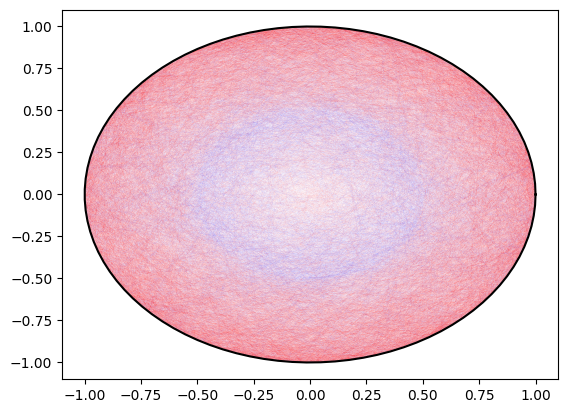

In [44]:
def plot_chords(x_short, y_short, x_long, y_long, mids, r=1, save=False, name='MX_Chords.png', dpi=1000):
	# Plot circle
	theta = np.linspace(0, 2*np.pi, 100)
	x = r*np.cos(theta)
	y = r*np.sin(theta)

	# Plot chords
	plt.plot(x_long, y_long, color='blue', linewidth=0.005)
	plt.plot(x_short, y_short, color='red', linewidth=0.005)
	plt.plot(x, y, 'k')
	if save:
		plt.savefig(name, dpi=dpi)

# plot_chords(*method2(10000), save=True, name='M2_Chords.png', dpi=1000)

In [43]:
x_short, y_short, x_long, y_long, mids = method2(1000000)

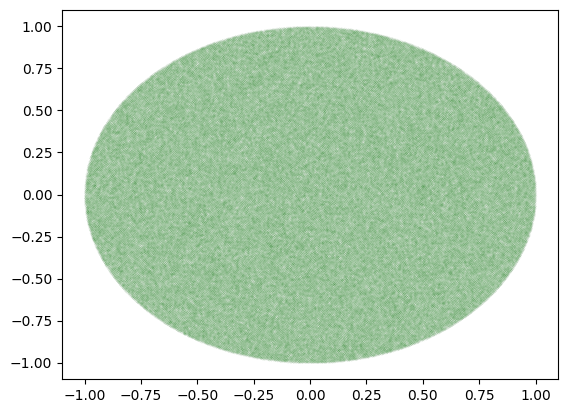

In [53]:
def plot_midpoints(mids, save=False, name='MX_Mids.png', dpi=1000):
	plt.scatter([i[0] for i in mids], [i[1] for i in mids], color='green', s=0.0001)
	if save:
		plt.savefig(name, dpi=dpi)
	
plot_midpoints(mids, save=True, name='M2_Mids2.png', dpi=1000)


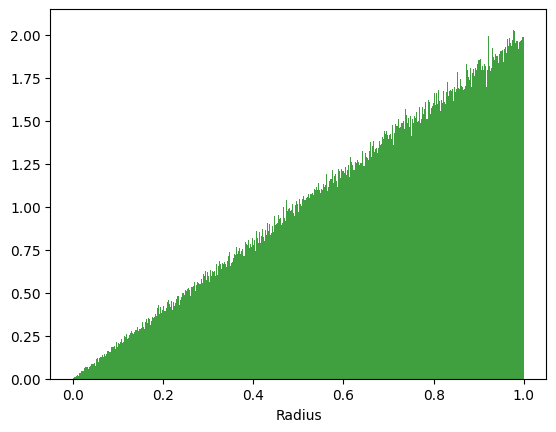

In [48]:
def plot_mp_distribution(mids, save=False, name='MX_Mids_Distribution.png', dpi=1000):
	module = [np.sqrt(i[0]**2 + i[1]**2) for i in mids]
	plt.hist(module, bins='sqrt', density=True, color='green', alpha=0.75)
	plt.xlabel('Radius')
	if save:
		plt.savefig(name, dpi=dpi)

# plot_mp_distribution(mids, save=True, name='Results/M2_Mids_Distribution.png')


In [57]:
def mymethod_simple(n=int(1e6)):
	prob = 0
	mids = []
	for i in range(n):
		# Select a random point inside the circle
		r = np.random.uniform(0, 1)
		alpha = np.random.uniform(0, 2*np.pi)
		x0 = r*np.cos(alpha)
		y0 = r*np.sin(alpha)

		# Select a random slope (in radians)
		theta = np.random.uniform(-np.pi/2, np.pi/2)

		# Slope of the chord
		m = np.tan(theta)

		# Coefficients of the quadratic equation
		a = 1 + m**2
		b = 2*m*y0 - 2*m**2*x0
		c = m**2*x0**2 + y0**2 - 2*m*x0*y0 - 1 

		# Calculate the x and y values of the chord
		x1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
		x2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

		y1 = m*x1 + y0 - m*x0
		y2 = m*x2 + y0 - m*x0

		# Calculate the midpoint of the chord
		mids.append([(x1+x2)/2, (y1+y2)/2])

		# Compare to triangle side length 
		if check_len(length(x1, y1, x2, y2)):
			prob += 1

	print('Probability: ', prob/n)
	return mids

mymids = mymethod()
